In [ ]:
from hashlib import new
#from typing import List
import matplotlib.pyplot as plt
import math as m
import numpy as np
import random as rd
import pandas as pd
import timeit


In [ ]:
L_str = []
L_int = []


file = open("tsp.txt",'r')
lines = [line.strip() for line in file]

for line in lines:
    L_str = line.split(', ')
    L_int.append((float(L_str[0]),float(L_str[1])))

In [ ]:


def PointsInCircum(r,n=100):
    return [(m.cos(2*m.pi/n*x)*r,m.sin(2*m.pi/n*x)*r) for x in range(0,n+1)]

J= PointsInCircum(100)

print(np.size(J))
#plt.scatter(J[:,0],J[:,1])

202


In [ ]:
def random_list(L_int):
    rd.shuffle(L_int)
    return L_int

In [ ]:
#This Function creates a new poppultion of size of pop, These are all random numbers 
def createPop(PopSize, List):
    pop=[]
    for i in range(0,PopSize):
        pop.append(list(random_list(List)))
    return pop

In [ ]:
#This  function takes in a list and return a distance 
def distance(L):
    S=0
    for i in range(len(L)-1):
        xy1=L[i]
        xy2=L[i+1]
        S+= ((xy2[0]-xy1[0])**2+(xy2[1]-xy1[1])**2)**(0.5)
    return S


In [ ]:
#Here we will select the top 50% of the population. Because we are Boujee Like that 💅🏻✨
def MatePoolSelect(List,popsize):
    n=int(popsize/2)
    L=np.array(List)
    
    dist=[]
    distnew=[]
    for i in range(0, popsize):
        dist.append((distance(L[i]),i))
    #print(dist[4])
    df = pd.DataFrame(dist, columns = ['Distance','Index'])
    m=df.sort_values(["Distance"], ascending=True)
    miaw=m.head(n)
    b=miaw.iloc[:,1:].values.T
    for i in range(0,n):
      distnew.append(List[b[0,i]])
    print(miaw)
    



    return distnew

In [ ]:
#Here we will do cross over breeding for the population of better adults after we are done killing off the useless people 🥱
def breed(List1,List2):
  bachamain1=[]
  bacha1=[]
  bacha2=[]
  a=0;b=0
  while (a==b):
    a= int(rd.random()* len(List1))
    b =int(rd.random()* len(List1))
  #print(a,b)
  start= min(a,b)
  end= max(a,b)

  for i in range(start,end):
    bacha1.append(List1[i])
    #bacha3.append(List2[i])
  
  for i in List2 :
    if i not in bacha1:
      bacha2.append(i)
  #for i in List1: 
    #if i not in bacha3:
      #bacha4.append(i)

  bachamain1 =bacha1+bacha2
  #bachamain2 =bacha3+bacha4

  return bachamain1 #bachamain2

def newchildren(Population,popsize):
  childs=[]
  
  for i in range(0, int(popsize/4)):
    k= breed(Population[i],Population[i+1])
    Population.append(k)
    #Population.append(l)
  #Population.append(childs)
  return Population

In [ ]:
#Here we will do Mutation here 🤪

def mutation(List,murate):
  for i in range(len(List)):
    if (rd.random()< murate):
      j= int(rd.random()*len(List))
      ek = List[i]
      dau= List[j]

      List[i]= dau
      List[j]= ek
  
  return List


def MutationFulltoo(Population,mutationrate):
  finalpop=[]
  for i in range(0,len(Population)):
    mutefellow=mutation(Population[i],mutationrate)
    finalpop.append(mutefellow)
  return finalpop

In [ ]:
#Putting All these ladies together 🥰

def Finalfunc(population, popsize, muterate):
  #J=createPop(popsize,L_int)
  #start = timeit.default_timer()
  m=MatePoolSelect(population,popsize)
  #print(np.size(m))
  #test1=m[0]
  #stop = timeit.default_timer()
  gula = newchildren(m,popsize)
  gula2= newchildren(gula,popsize)

  #print('Time: ', stop - start)  
  
  #test2=gula[0]
  #print(np.sum(np.array(test1)-np.array(test2)))
  #print(np.size(gula))
  Akhri = MutationFulltoo(gula,muterate)
  #print(np.size(Akhri))
  
  return Akhri


poppulation=createPop(128,J)
Length=[]
animation=[]
Length.append(distance(poppulation[0]))
for i in range(0,5000):
  poppulation=Finalfunc(poppulation,128,0.0009)
  Length.append(distance(poppulation[0]))
  if (i%10 == 0):
    animation.append(poppulation)
  
#plt.plot(Length)

Streaming output truncated to the last 5000 lines.

[64 rows x 2 columns]
       Distance  Index
0    684.451147      0
17   684.451147     17
16   684.451147     16
15   684.451147     15
14   684.451147     14
..          ...    ...
58   734.572041     58
63   740.649999     63
126  759.101083    126
66   765.253469     66
123  780.795682    123

[64 rows x 2 columns]
       Distance  Index
0    684.451147      0
113  684.451147    113
16   684.451147     16
12   684.451147     12
11   684.451147     11
..          ...    ...
56   684.451147     56
57   697.003051     57
58   734.182924     58
59   734.572041     59
85   740.446483     85

[64 rows x 2 columns]
       Distance  Index
12   684.451147     12
15   684.451147     15
14   684.451147     14
13   684.451147     13
11   684.451147     11
..          ...    ...
60   697.003051     60
61   734.182924     61
111  746.691467    111
106  770.578400    106
66   795.493641     66

[64 rows x 2 columns]
       Distance  Index
97   6

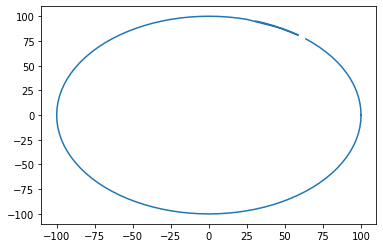

In [ ]:
K=poppulation[0]
K = np.array(K)
plt.plot(K[:,0],K[:,1])

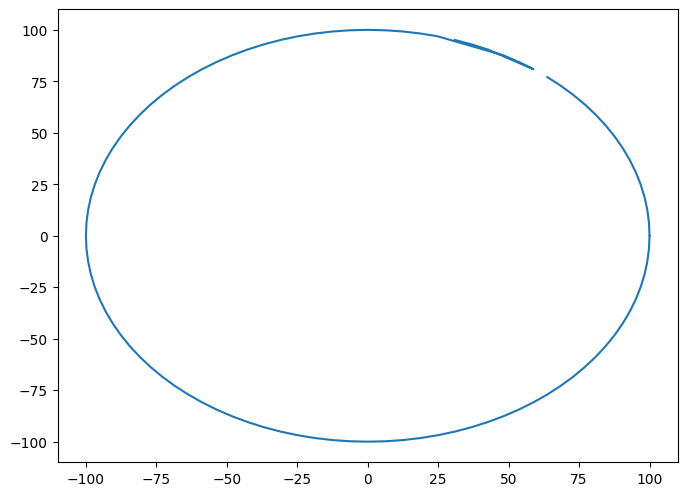

In [ ]:
from matplotlib.pyplot import figure
u=(animation[-1])
t=u[0]
t = np.array(t)
figure(figsize=(8, 6), dpi=100)
plt.plot(t[:,0],t[:,1])


In [ ]:
J= 